## __Problem__
Perusahaan asuransi menggelar sebuah campaign untuk menjual asuransi kendaraan mereka. Untuk mencapai target yang lebih optimal, maka perusahaan akan meninjau bagaimana data promosi mereka untuk campaign berikutnya.

## __Goal__
- Melihat kecenderungan calon kostumer yang tertarik dengan asuransi kendaraan ini
- melihat karakteristik berdasarkan dataset, target pasar untuk campaign asuransi kendaraan berikutnya

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [175]:
df = pd.read_csv('./Machine-Learning-Exam-master/Insurance.csv')
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


#### describing Data

In [176]:
df.shape

(4000, 19)

In [177]:
df.isna().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [204]:
df.Age.unique()

array([32, 29, 25, 30, 37, 35, 27, 53, 44, 38, 61, 34, 46, 49, 50, 57, 80,
       31, 63, 60, 54, 45, 42, 36, 39, 33, 41, 40, 79, 47, 78, 52, 18, 28,
       58, 23, 55, 56, 43, 48, 19, 62, 64, 24, 73, 26, 51, 59, 66, 20, 77,
       71, 69, 72, 68, 65, 22, 67, 70, 75, 21, 87, 83, 82, 84, 81, 76, 92,
       86, 95])

In [178]:
dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isnull().sum(),
        round((((df[i].isnull().sum()) / (len(df))) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [179]:
pd.DataFrame(dataDesc, columns=[
    'Data Features',
    'Data Types',
    'Null',
    'Null Percentage',
    'Unique',
    'Unique Sample'
] )

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,Id,int64,0,0.00,4000,"[185, 528]"
1,Age,int64,0,0.00,70,"[58, 22]"
2,Job,object,19,0.48,11,"[management, nan]"
3,Marital,object,0,0.00,3,"[single, married]"
4,Education,object,169,4.23,3,"[tertiary, primary]"
5,Default,int64,0,0.00,2,"[0, 1]"
6,Balance,int64,0,0.00,2178,"[120, 4718]"
7,HHInsurance,int64,0,0.00,2,"[0, 1]"
8,CarLoan,int64,0,0.00,2,"[1, 0]"
9,Communication,object,902,22.55,2,"[cellular, telephone]"


Terdapat 4 variabel yang memiliki nilai Nan :
- Job
- Education
- Communication
- Outcome

#### Handling Missing Value

In [180]:
## Missing Value pada variabel Outcome

In [197]:
## Menghapus Outcome krna memiliki presentase NaN 76%

df.drop(columns='Outcome', inplace=True)

In [182]:
Tidak jadi dipakai

# ## Menghapus baris yang memiliki nilai Nan pada ketiga variabel yaitu Job, Education, dan Communication

# df.dropna(how='any', subset=['Job', 'Education', 'Communication'])
# df_mod.shape

In [183]:
## Missing Value pada variabel Communication

In [184]:
df.Communication.value_counts(dropna=False)

# proses kampanye paling sering dilakukan lewat telepon genggam (HandPhone)

cellular     2831
NaN           902
telephone     267
Name: Communication, dtype: int64

In [185]:
df['Communication'] = df['Communication'].fillna('cellular')

In [186]:
## Missing Value pada variabel Job

In [187]:
df.Job.value_counts(dropna=False)

management       893
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
NaN               19
Name: Job, dtype: int64

In [188]:
df['Job'] = df['Job'].fillna('None')

In [189]:
df.Job.value_counts(dropna=False)

management       893
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
None              19
Name: Job, dtype: int64

In [190]:
## Missing Value pada variabel Education

In [191]:
df.Education.value_counts(dropna=False)

secondary    1988
tertiary     1282
primary       561
NaN           169
Name: Education, dtype: int64

In [193]:
education_list=[]

for job in df.Job.value_counts().index:
    mode = df[df.Job==job]['Education'].value_counts().nlargest(1).index
    education_list = np.append(education_list,mode)
    
education_mapping=pd.Series(education_list,index=df.Job.value_counts().index)

for j in df.Job.value_counts().index:
    df.loc[(df['Education'].isnull()) & (df['Job']==j),'Education'] = edu_map.loc[edu_map.index==j][0]

df['Education'].fillna('None',inplace=True)

In [194]:
edu_map

management        tertiary
blue-collar      secondary
technician       secondary
admin.           secondary
services         secondary
retired          secondary
self-employed     tertiary
student          secondary
unemployed       secondary
entrepreneur      tertiary
housemaid          primary
None             secondary
dtype: object

In [195]:
df.Education.value_counts(dropna=False)

secondary    2117
tertiary     1318
primary       565
Name: Education, dtype: int64

In [198]:
df.isna().sum()

Id                  0
Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
CallStart           0
CallEnd             0
CarInsurance        0
dtype: int64

In [203]:
df.to_csv('Insurance-clean.csv')

In [211]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Id,4000.0,2000.50,1154.84,1.0,1000.75,2000.5,3000.25,4000.0
Age,4000.0,41.21,11.55,18.0,32.00,39.0,49.00,95.0
Default,4000.0,0.01,0.12,0.0,0.00,0.0,0.00,1.0
Balance,4000.0,1532.94,3511.45,-3058.0,111.00,551.5,1619.00,98417.0
HHInsurance,4000.0,0.49,0.50,0.0,0.00,0.0,1.00,1.0
CarLoan,4000.0,0.13,0.34,0.0,0.00,0.0,0.00,1.0
LastContactDay,4000.0,15.72,8.43,1.0,8.00,16.0,22.00,31.0
NoOfContacts,4000.0,2.61,3.06,1.0,1.00,2.0,3.00,43.0
DaysPassed,4000.0,48.71,106.69,-1.0,-1.00,-1.0,-1.00,854.0
PrevAttempts,4000.0,0.72,2.08,0.0,0.00,0.0,0.00,58.0


In [212]:
df.describe(include='O')

,Job,Marital,Education,Communication,LastContactMonth,CallStart,CallEnd
count,4000,4000,4000,4000,4000,4000,4000
unique,12,3,3,2,12,3777,3764
top,management,married,secondary,cellular,may,13:54:34,10:52:24
freq,893,2304,2117,3733,1049,3,3


## Handling Outliers/Imbalanced Data

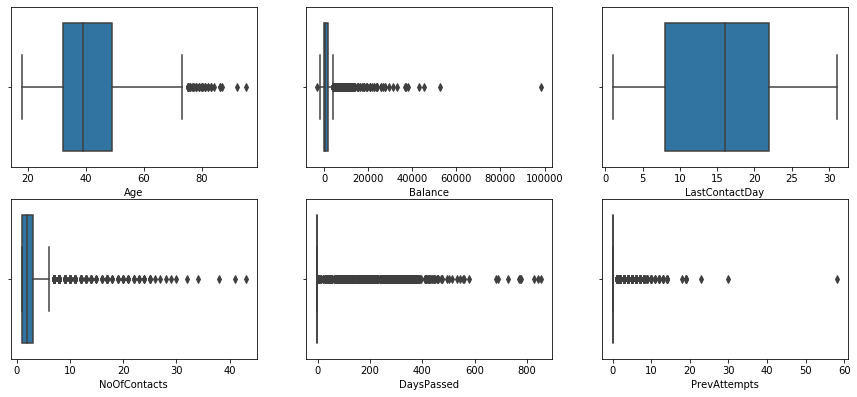

In [201]:
df_describe = df.drop(columns = ['Id', 'Default', 'HHInsurance','CarLoan', 'Communication', 'CarInsurance'])


plt.figure(figsize = (15, 10))
x = 1      

for column in df_describe.describe():
    plt.subplot(3,3,x)
    sns.boxplot(df[column])
    x += 1

In [205]:
## dari data ini, dapat dilihat bahwa cukup masuk akal orang berumur 95 tahun telah pensiun, dengan status edukasi primary, dan dihubungi melalui telepon biasa
df.loc[df['Age'].idxmax()]

Id                       3838
Age                        95
Job                   retired
Marital              divorced
Education             primary
Default                     0
Balance                  2282
HHInsurance                 0
CarLoan                     0
Communication       telephone
LastContactDay             21
LastContactMonth          apr
NoOfContacts               17
DaysPassed                 -1
PrevAttempts                0
CallStart            16:56:10
CallEnd              16:59:37
CarInsurance                1
Name: 3837, dtype: object

In [207]:
df.loc[df['Age'].idxmin()]

Id                        63
Age                       18
Job                  student
Marital               single
Education            primary
Default                    0
Balance                  608
HHInsurance                0
CarLoan                    0
Communication       cellular
LastContactDay            12
LastContactMonth         aug
NoOfContacts               1
DaysPassed                -1
PrevAttempts               0
CallStart           13:30:30
CallEnd             13:34:57
CarInsurance               1
Name: 62, dtype: object

### Analysis & Visualization Data

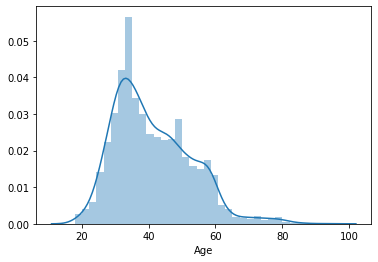

In [206]:
sns.distplot(df['Age'])

In [209]:
bin_age_generation = [18, 34, 50, 69, df['Age'].max()]
label_age_generation = ['Millenials', 'Gen X', 'Boomer', 'Silent']

df['Generation'] = pd.cut(df['Age'], bins = bin_age_generation, labels = label_age_generation)
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance,Generation
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,13:45:20,13:46:30,0,Millenials
1,2,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,14:49:03,14:52:08,0,Millenials
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,16:30:24,16:36:04,1,Millenials
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,12:06:43,12:20:22,1,Millenials
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,14:35:44,14:38:56,0,Millenials


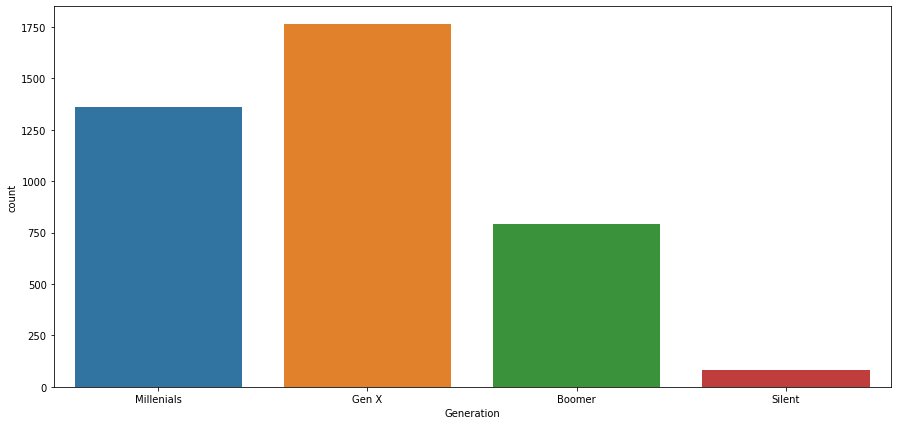

In [210]:
plt.figure(figsize = (15 , 7))
sns.countplot(df['Generation'])
plt.show()

In [216]:
pd.crosstab(index=df['CarInsurance'],columns=df['Generation'], margins=True)

Generation,Millenials,Gen X,Boomer,Silent,All
CarInsurance,,,,,
0,785,1137,452,22,2396
1,573,625,340,60,1598
All,1358,1762,792,82,3994


In [217]:
pd.crosstab(index=df['CarInsurance'],columns=df['Education'],margins=True)

Education,primary,secondary,tertiary,All
CarInsurance,,,,
0,369,1329,698,2396
1,196,788,620,1604
All,565,2117,1318,4000


In [219]:
df.pivot_table(index='CarInsurance', columns=['Generation']
                       ,values='Balance', aggfunc='mean').round(2)

Generation,Millenials,Gen X,Boomer,Silent
CarInsurance,,,,
0,1105.51,1338.95,2038.42,3421.59
1,1455.36,1765.96,1925.05,2519.87


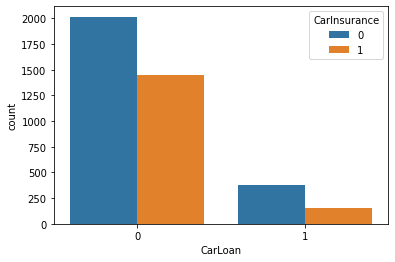

In [220]:
sns.countplot(x='CarLoan', hue='CarInsurance', data=df)

In [221]:
pd.crosstab(index=df['CarLoan'],columns=[df['HHInsurance'],df['CarInsurance']], margins=True)

HHInsurance      0           1        All
CarInsurance     0     1     0    1      
CarLoan                                  
0              865   954  1151  498  3468
1              151    59   229   93   532
All           1016  1013  1380  591  4000

In [225]:
pd.crosstab(index=df['LastContactMonth'],columns=df['CarInsurance'], margins=True)

CarInsurance,0,1,All
LastContactMonth,,,
apr,150,156,306
aug,342,194,536
dec,7,34,41
feb,129,133,262
jan,86,48,134
jul,364,209,573
jun,283,171,454
mar,15,64,79
may,760,289,1049


In [226]:
pd.crosstab(index=df['LastContactMonth'],columns=[df['CarLoan'],df['CarInsurance']], margins=True)

CarLoan              0          1        All
CarInsurance         0     1    0    1      
LastContactMonth                            
apr                133   145   17   11   306
aug                316   184   26   10   536
dec                  7    34    0    0    41
feb                113   124   16    9   262
jan                 72    46   14    2   134
jul                239   164  125   45   573
jun                245   160   38   11   454
mar                 15    62    0    2    79
may                660   245  100   44  1049
nov                174   121   41   11   347
oct                 24    85    3    6   118
sep                 18    82    0    1   101
All               2016  1452  380  152  4000